# 🎬 Netflix EDA Project 📊

    Welcome to this exploratory data analysis project on Netflix’s dataset.  
    We'll uncover patterns, popular content, content trends, ratings, and more.

    Let's dive in and find out how Netflix entertains the world! 🌍🍿

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/pranav-builds/netflix-edm-project/refs/heads/main/netflix_titles.csv"
df = pd.read_csv(url)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Check null values
print("Null values in each column:")
print(df.isnull().sum())

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing values
df['rating'].fillna("Unknown", inplace=True)
df['director'].fillna("No Director", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Final info after cleaning
print("\nData Info After Cleaning:")
print(df.info())

Null values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804

<ipython-input-4-9a2782b95062>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna("Unknown", inplace=True)
<ipython-input-4-9a2782b95062>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
from collections import Counter
import itertools

# 📌 Basic Info
print("🔹 Total Rows:", df.shape[0])
print("🔹 Total Columns:", df.shape[1])

# 📊 Movies vs TV Shows
print("\n🎬 Content Type Distribution:")
print(df['type'].value_counts())

# 📅 Oldest and Newest content
print("\n📅 Year Range:")
print(f"🔸 Oldest Release Year: {df['release_year'].min()}")
print(f"🔸 Newest Release Year: {df['release_year'].max()}")

# 🎭 Most Common Ratings
print("\n🔞 Top 10 Ratings:")
print(df['rating'].value_counts().head(10))

# 🌍 Most Common Countries
print("\n🌍 Top 10 Countries Producing Content:")
print(df['country'].value_counts().head(10))

# 🎭 Most Common Genres
genre_list = list(itertools.chain.from_iterable(df['listed_in'].str.split(', ')))
genre_counts = Counter(genre_list)
print("\n🎭 Top 10 Genres on Netflix:")
for genre, count in genre_counts.most_common(10):
    print(f"{genre}: {count}")

# 🎬 Top Directors
print("\n🎬 Top 10 Directors (Most Shows/Movies):")
print(df['director'].value_counts().head(10))


🔹 Total Rows: 8807
🔹 Total Columns: 12

🎬 Content Type Distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

📅 Year Range:
🔸 Oldest Release Year: 1925
🔸 Newest Release Year: 2021

🔞 Top 10 Ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

🌍 Top 10 Countries Producing Content:
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

🎭 Top 10 Genres on Netflix:
International Movies: 2752
Dramas: 2427
Comedies: 1674
International TV Shows: 1351
Documentaries: 869
Action & Adventure: 859
TV Dramas: 763
Independent Movies: 756
Children & Family Movies: 641
Romantic Movies: 616

🎬 Top 10 Directors (Most Shows/Movies):
director
No Dir

<ipython-input-7-022e5d236083>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')


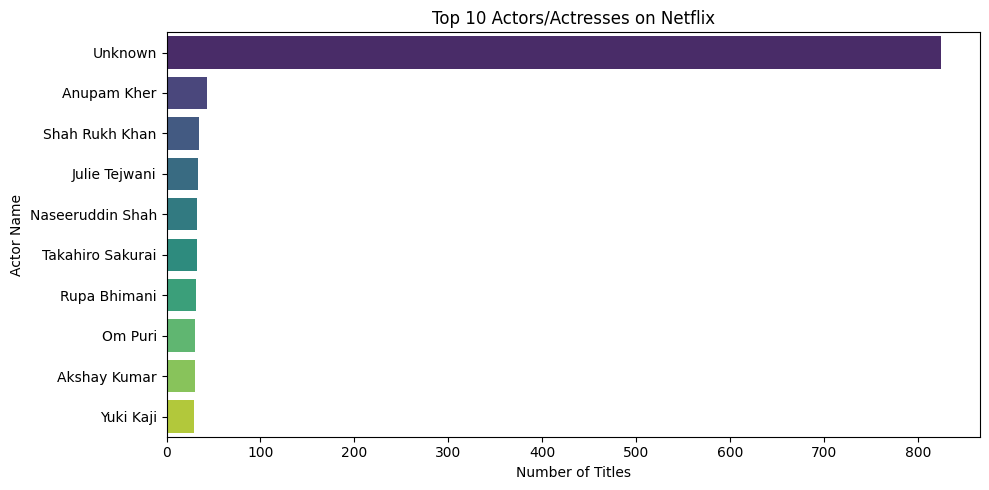

In [ ]:
# Split cast by comma and flatten the list
all_actors = df['cast'].dropna().str.split(', ')
flat_actor_list = list(itertools.chain.from_iterable(all_actors))

# Count and show top 10
top_actors = pd.Series(flat_actor_list).value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.title("Top 10 Actors/Actresses on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor Name")
plt.tight_layout()
plt.show()


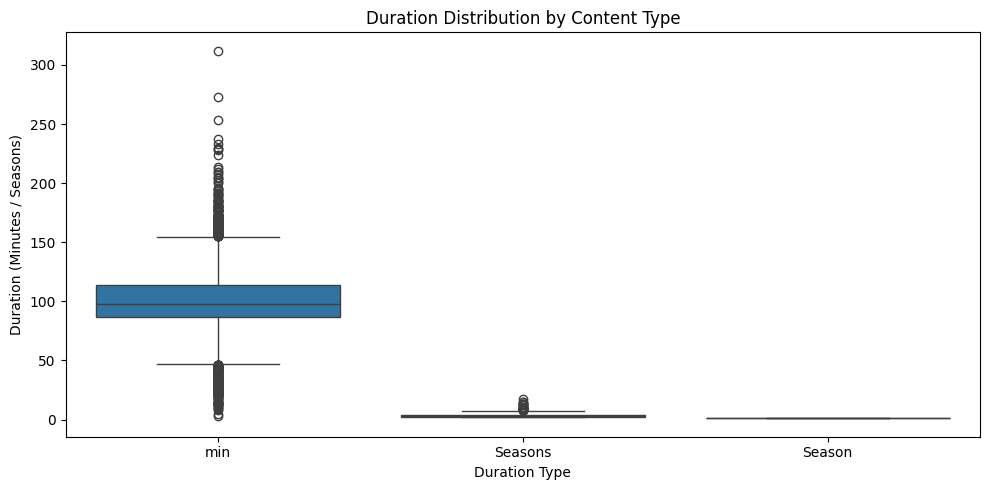

In [ ]:
# Create separate columns
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

# Plot distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='duration_type', y='duration_num', data=df)
plt.title("Duration Distribution by Content Type")
plt.xlabel("Duration Type")
plt.ylabel("Duration (Minutes / Seasons)")
plt.tight_layout()
plt.show()


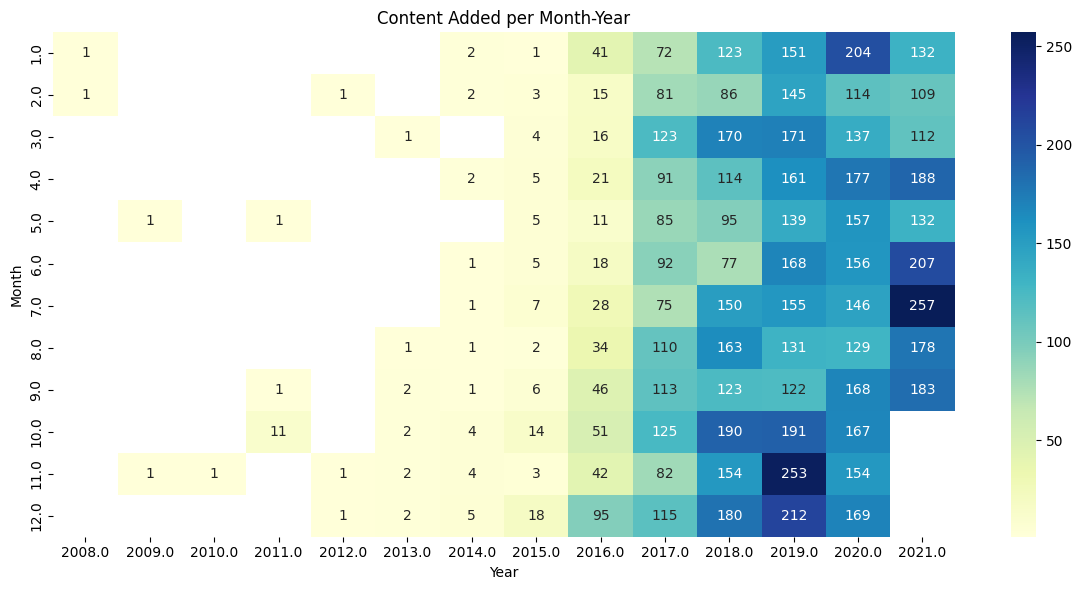

In [ ]:
# Extract month and year
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# Group by year and month
monthly_trend = df.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Pivot for heatmap-style plot
pivot_table = monthly_trend.pivot(index='month_added', columns='year_added', values='count')

# Plot
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Content Added per Month-Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.show()


Content Type from India:
type
Movie      962
TV Show     84
Name: count, dtype: int64


<ipython-input-10-65c94552ea5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=india_df, x='type', palette='Set2')


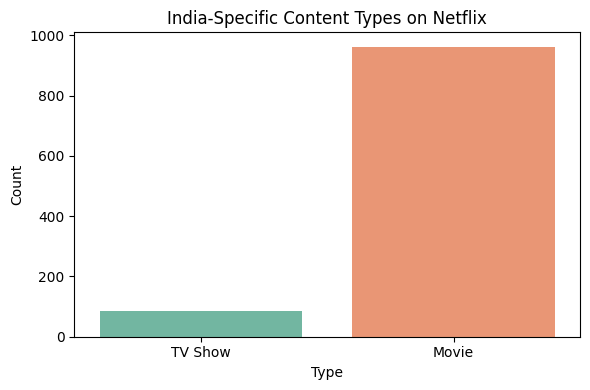

In [ ]:
# Filter Indian content
india_df = df[df['country'].str.contains("India", na=False)]

# Count by type
print("Content Type from India:")
print(india_df['type'].value_counts())

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=india_df, x='type', palette='Set2')
plt.title("India-Specific Content Types on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


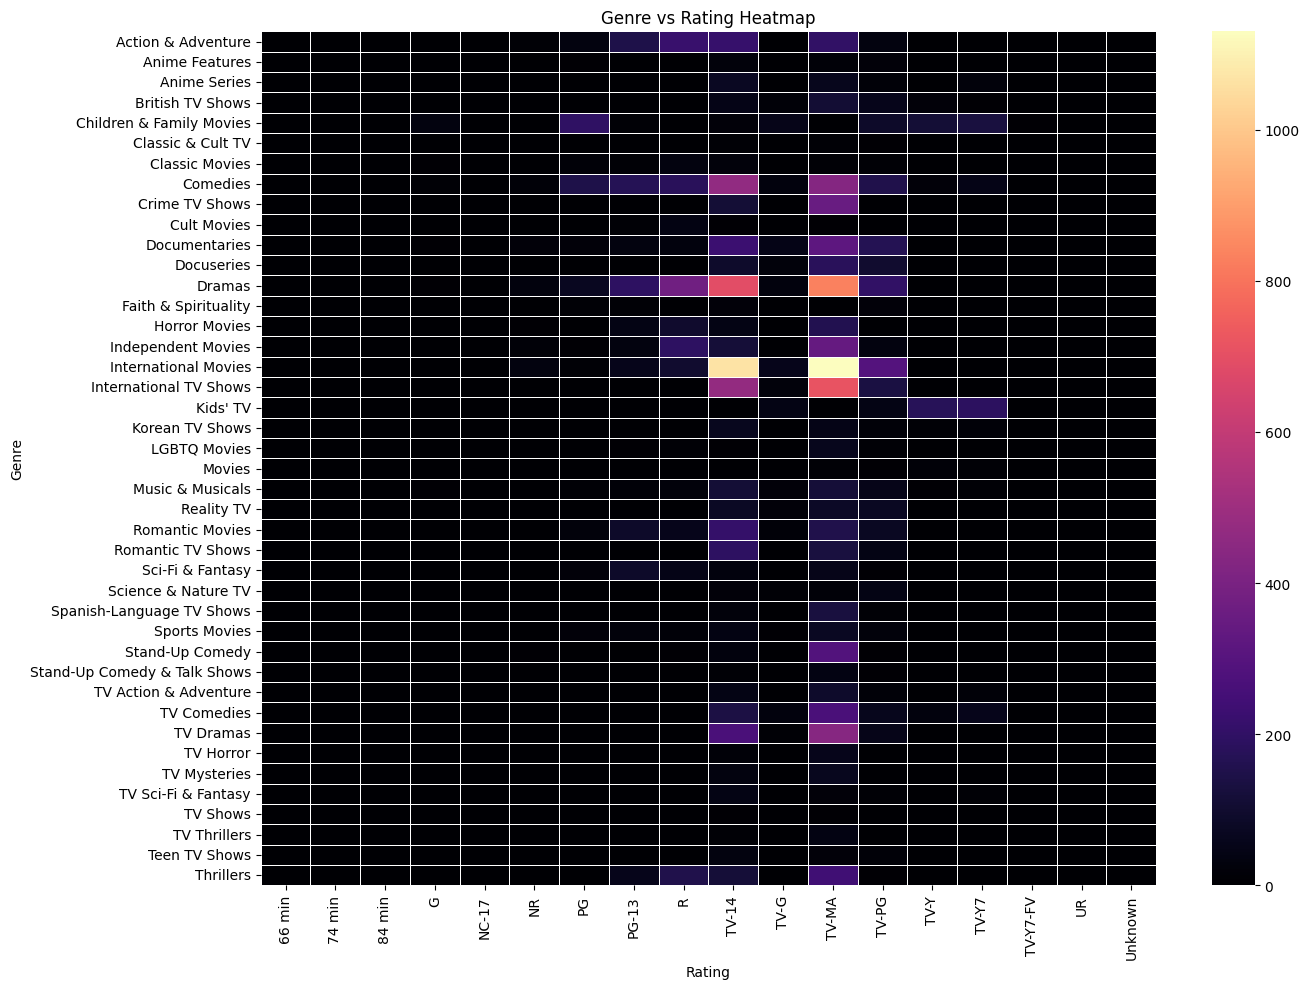

In [ ]:
# Explode multiple genres
df_exploded = df.copy()
df_exploded['genre'] = df['listed_in'].str.split(', ')
df_exploded = df_exploded.explode('genre')

# Create pivot table
heatmap_data = df_exploded.pivot_table(index='genre', columns='rating', values='title', aggfunc='count').fillna(0)

# Plot
plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data, cmap="magma", linewidths=0.5)
plt.title("Genre vs Rating Heatmap")
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


<ipython-input-12-7e8faf2bff92>:34: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


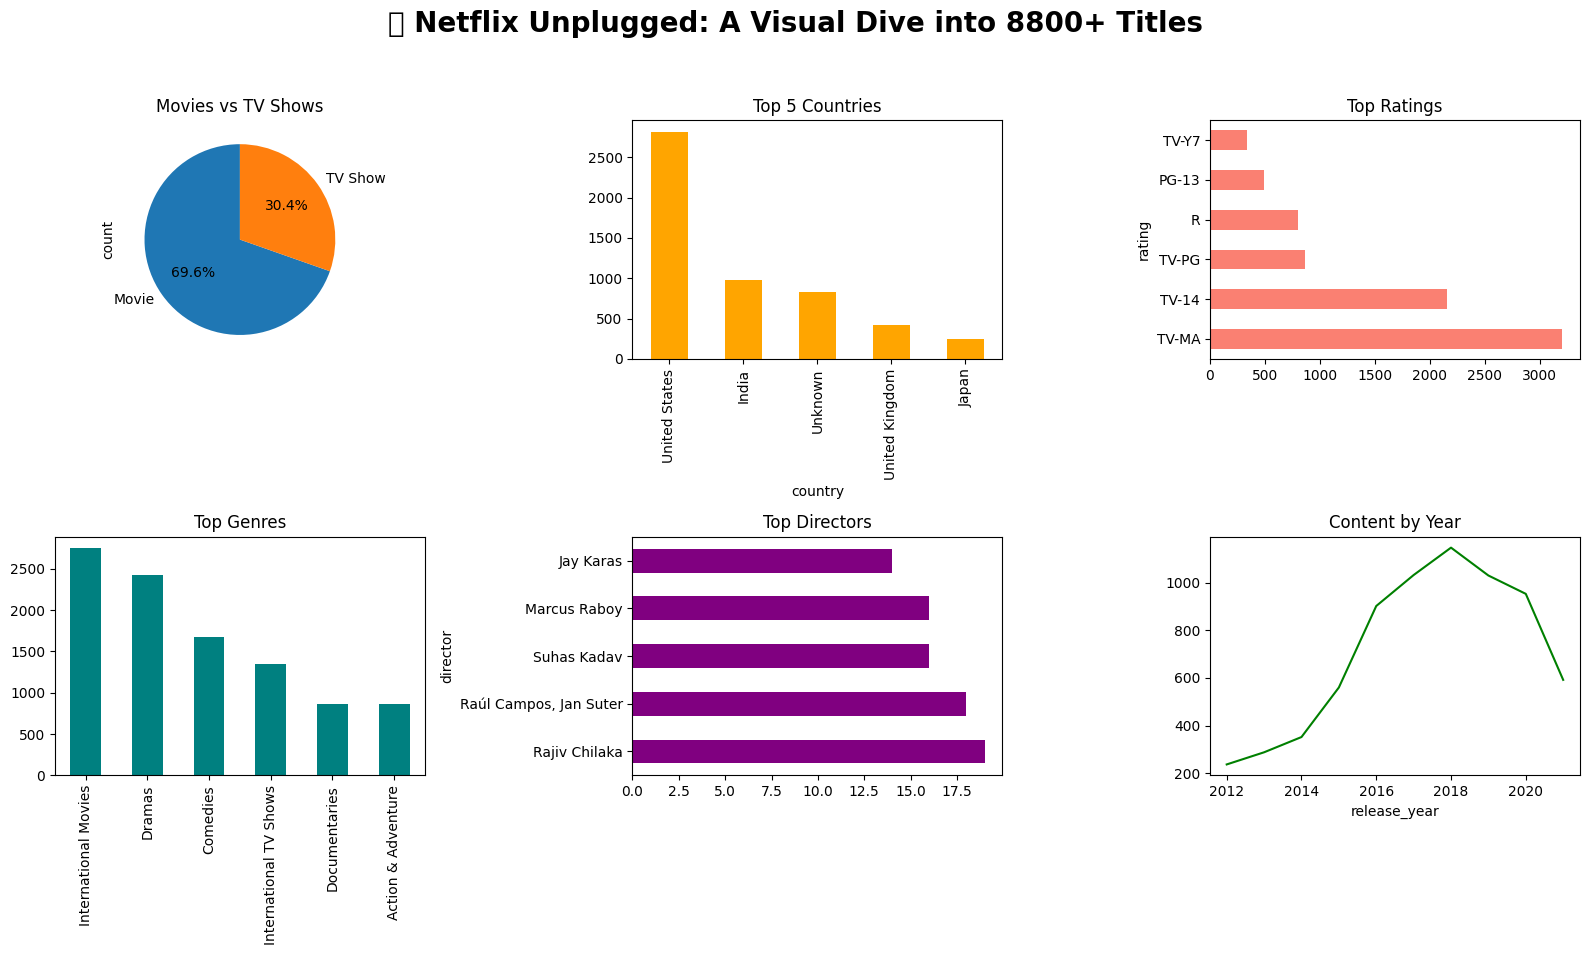

In [ ]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of simple stats
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('🎬 Netflix Unplugged: A Visual Dive into 8800+ Titles', fontsize=20, fontweight='bold')

# Subplot 1 - Content Type
df['type'].value_counts().plot(kind='pie', ax=axs[0, 0], autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Movies vs TV Shows')

# Subplot 2 - Top Country
df['country'].value_counts().head(5).plot(kind='bar', ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Top 5 Countries')

# Subplot 3 - Rating Distribution
df['rating'].value_counts().head(6).plot(kind='barh', ax=axs[0, 2], color='salmon')
axs[0, 2].set_title('Top Ratings')

# Subplot 4 - Top Genres
genres = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres.dropna() for genre in sublist]
pd.Series(all_genres).value_counts().head(6).plot(kind='bar', ax=axs[1, 0], color='teal')
axs[1, 0].set_title('Top Genres')

# Subplot 5 - Top Directors
df['director'].value_counts().drop('No Director').head(5).plot(kind='barh', ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Top Directors')

# Subplot 6 - Year Trend
df['release_year'].value_counts().sort_index().tail(10).plot(ax=axs[1, 2], color='green')
axs[1, 2].set_title('Content by Year')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


🧠 Top 5 Insights from the Netflix Dataset

🎬 Movies dominate over TV Shows
  
      More than 69% of Netflix's catalog is Movies. TV Shows make up the remaining 31%.

🌍 The majority of content is from the USA
  
    United States alone contributes to over 2800 titles, followed by India and the UK.

📈 Peak content addition was in 2019
  
    Netflix added the most titles in 2019, showing major platform expansion that year.

🔞 TV-MA is the most common rating
  
    Over 3200 titles are rated TV-MA, indicating a focus on mature content.

🎭 "International Movies" & "Dramas" are most frequent genres
  
    These genres appear most frequently, showing viewer interest in global and emotional storytelling.



✍️ Conclusion

    This EDA reveals that Netflix focuses heavily on Movies, mature-rated content, and international variety. It also shows how Netflix grew aggressively around 2019. This analysis helps understand content trends, target audiences, and market direction.